In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/titanic_dataset .csv')

**Check the basic details of the dataset**

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Displays the statistical details
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Displays the number of null values in each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
#Displays the column names
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
# Making PassengerId as index column
data=pd.read_csv('/content/titanic_dataset .csv', index_col ='PassengerId')

In [32]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
#To display the numerical and categorical columns in the dataset
num = data.median().index

<ipython-input-33-ba275608393c>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  num = data.median().index


In [34]:
num

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [35]:
cat =[i for i in data.columns if i not in num]

In [36]:
cat

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

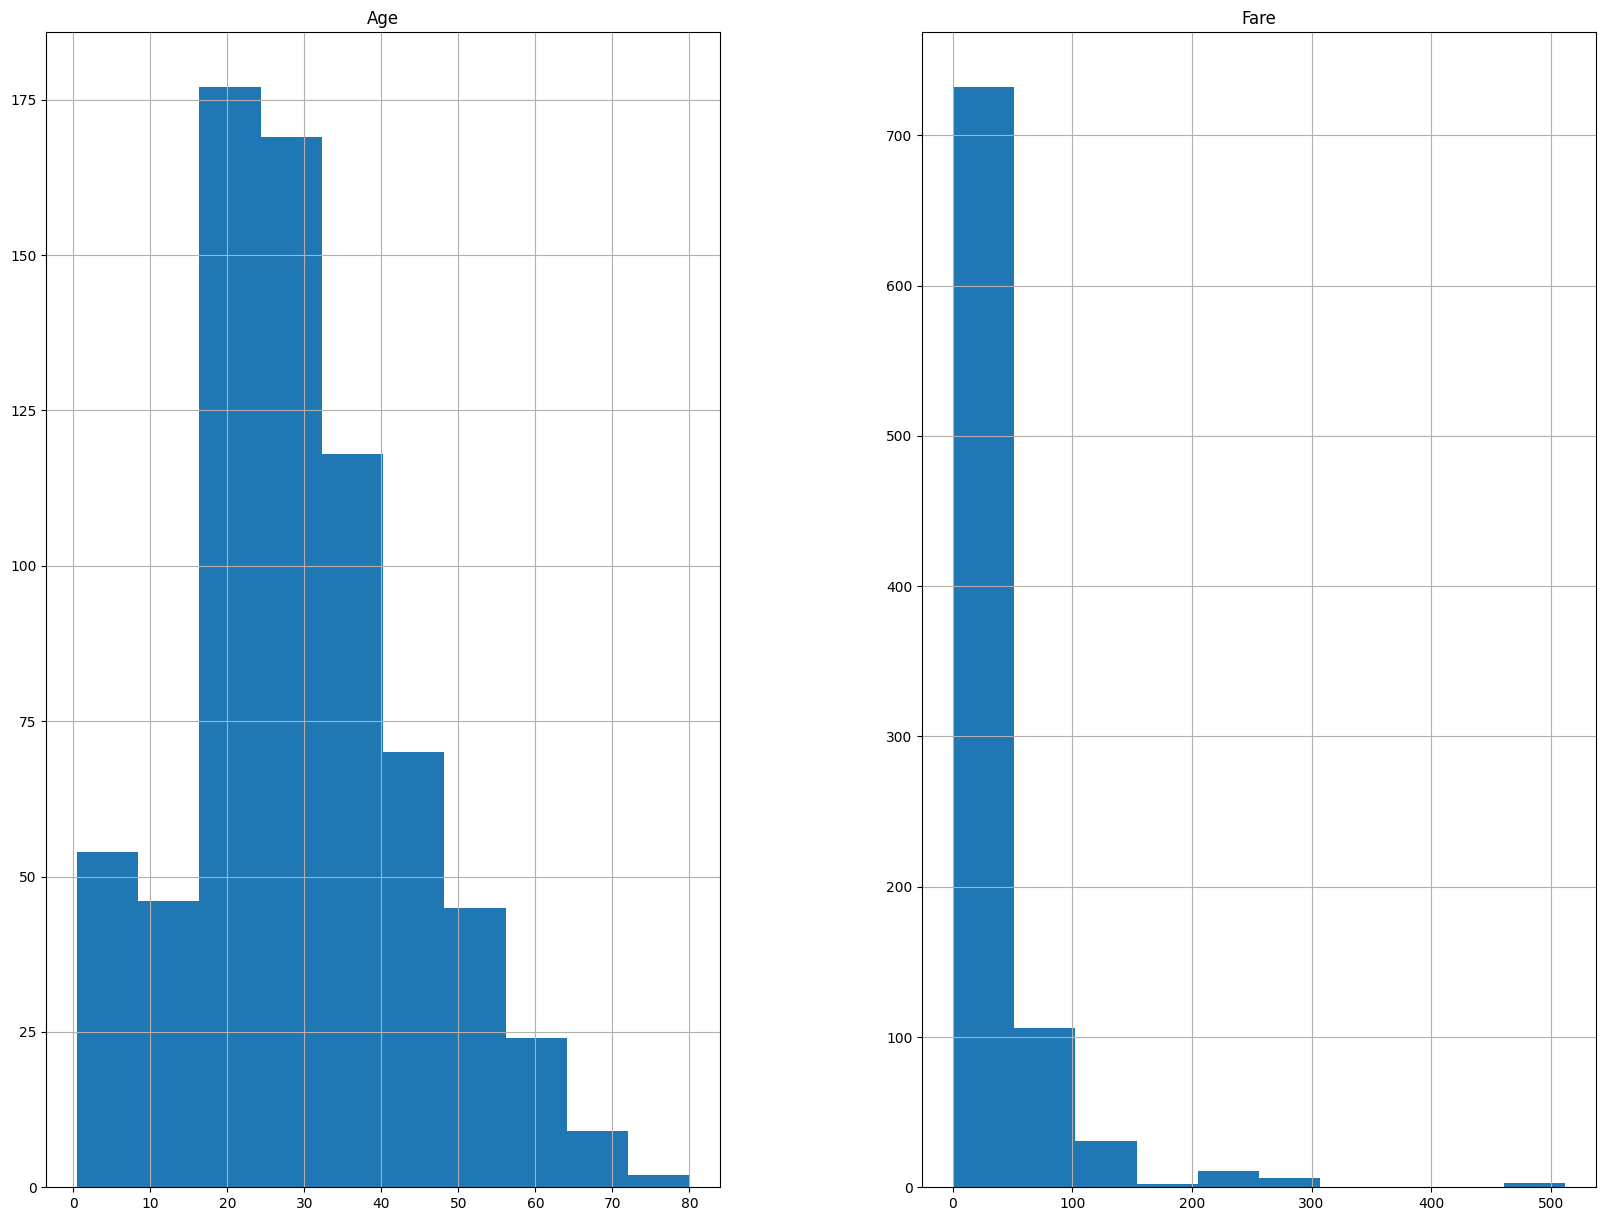

In [37]:
#Histograms provide a quick visual summary of the data's distribution.
freqgraph=data.select_dtypes(include='float64')
freqgraph.hist(figsize=(20,15))
plt.show()

**Fill in all the missing values present in all the columns in the dataset**

In [38]:
data['Age']= data['Age'].fillna(data['Age'].median())

In [39]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [40]:
#Using forward filling method
data['Embarked'].fillna(method='ffill',inplace=True)

In [41]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [42]:
data.drop(['Cabin'],axis =1,inplace = True)

In [43]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [44]:
#Checking Outliers
num_cols=['Age','Fare']

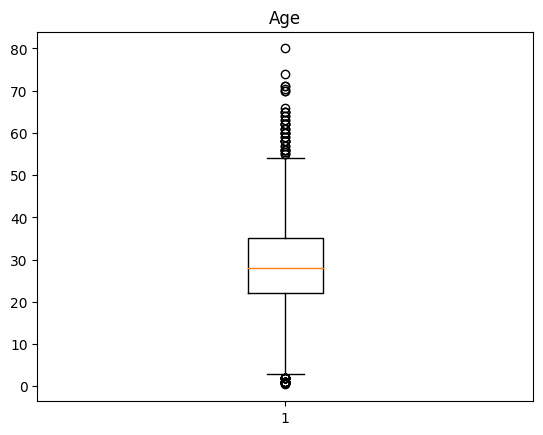

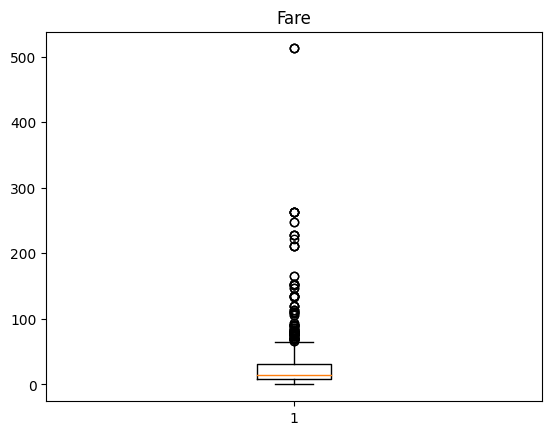

In [45]:
for i in num_cols:
 plt.figure()
 plt.boxplot(data[i])
 plt.title(i)

In [46]:
Q1=np.percentile(data['Age'],25,method = 'midpoint')
Q2=np.percentile(data['Age'],50,method = 'midpoint')
Q3=np.percentile(data['Age'],75,method = 'midpoint')
print (Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [47]:
IQR= Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is", low_lim)
print("max is", up_lim)

min is 2.5
max is 54.5


In [48]:
outlier =[]
for x in data['Age']:
  if ((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [49]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [50]:
ind1 = data['Age']>up_lim
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [51]:
#Dropping the outliers
data.drop([12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [52]:
Q1=np.percentile(data['Fare'],25,method = 'midpoint')
Q2=np.percentile(data['Fare'],50,method = 'midpoint')
Q3=np.percentile(data['Fare'],75,method = 'midpoint')
print (Q1)
print(Q2)
print(Q3)

7.8958
14.1083
30.5


In [53]:
IQR= Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("min is", low_lim)
print("max is", up_lim)

min is -26.0105
max is 64.4063


In [54]:
outlier =[]
for x in data['Fare']:
  if ((x>up_lim) or (x<low_lim)):
    outlier.append(x)

In [55]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [56]:
ind1 = data['Fare']>up_lim
data.loc[ind1].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=108)

In [57]:
data.drop ([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,780, 790, 793, 803, 821, 836, 847, 850, 857, 864],inplace =True )

In [58]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()

In [61]:
#Label encoding the column 'Embarked'
data['Embarked'].unique()

array(['S', 'Q', 'C'], dtype=object)

In [62]:
data['Embarked']= le.fit_transform(data['Embarked'])

In [63]:
data['Embarked'].unique()

array([2, 1, 0])

In [64]:
data.drop(['Name'],axis =1,inplace = True)


In [65]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,2
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,2
4,1,1,female,35.0,1,0,113803,53.1000,2
5,0,3,male,35.0,0,0,373450,8.0500,2
6,0,3,male,28.0,0,0,330877,8.4583,1
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,2
888,1,1,female,19.0,0,0,112053,30.0000,2
889,0,3,female,28.0,1,2,W./C. 6607,23.4500,2


In [66]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [67]:
data['Sex']= le.fit_transform(data['Sex'])

In [68]:
data['Sex'].unique()

array([1, 0])

In [69]:
data.drop(['Ticket'],axis =1,inplace = True)

In [70]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
6,0,3,1,28.0,0,0,8.4583,1
...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2
889,0,3,0,28.0,1,2,23.4500,2


In [113]:
minmax = preprocessing.MinMaxScaler(feature_range = (0,1))
x = minmax.fit_transform(data)
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,0.383595,0.685766,0.647768,0.507701,0.063329,0.062525,0.057811,0.774427
std,0.486555,0.403625,0.477954,0.204651,0.129392,0.134137,0.092905,0.390586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.402762,0.000000,0.000000,0.015412,0.500000
50%,0.000000,1.000000,1.000000,0.514744,0.000000,0.000000,0.025374,1.000000
75%,1.000000,1.000000,1.000000,0.608063,0.125000,0.000000,0.056604,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

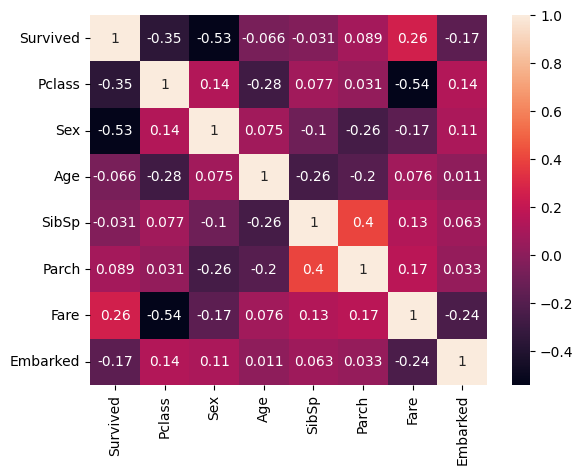

In [114]:
#correlations between the numerical features in your dataset.
corrmatrix = data.corr()
sns.heatmap(corrmatrix,annot=True)

In [115]:
y = data['Survived']
x = data.drop(['Survived'],axis=1)

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25,random_state=42)

In [117]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [118]:
model = lr.fit(x_train,y_train)

In [119]:
y_predictions=model.predict(x_test)

In [120]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [83]:
#checking confusion matrix,TrueNegative will be displayed first
confusion_matrix(y_test,y_predictions)

array([[116,  13],
       [ 28,  51]])

In [84]:
y_predictions

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [121]:
print('Accuracy = ',accuracy_score(y_test,y_predictions))
print('Precision = ',precision_score(y_test,y_predictions))
print('Recall = ',recall_score(y_test,y_predictions))
print('F1 Score = ',f1_score(y_test,y_predictions))

Accuracy =  0.8028846153846154
Precision =  0.796875
Recall =  0.6455696202531646
F1 Score =  0.7132867132867134


** kNN**

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
metric_k = []
neighbors=np.arange(3,15)

In [124]:
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors= k, metric = 'euclidean')
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

In [125]:
metric_k

[0.6634615384615384,
 0.6538461538461539,
 0.6778846153846154,
 0.6826923076923077,
 0.6778846153846154,
 0.6826923076923077,
 0.6826923076923077,
 0.6826923076923077,
 0.6971153846153846,
 0.6875,
 0.6971153846153846,
 0.6971153846153846]

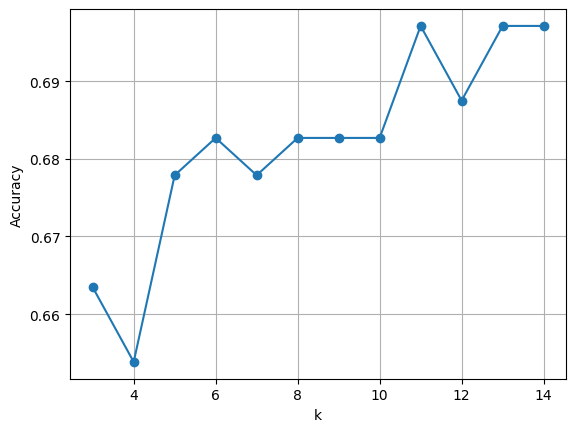

In [90]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()

In [126]:
classifier = KNeighborsClassifier(n_neighbors= 11, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score(y_test,y_pred)
metric_k.append(acc)

In [127]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ',precision_score(y_test,y_pred))
print('Recall = ',recall_score(y_test,y_pred))
print('F1 Score = ',f1_score(y_test,y_pred))

Accuracy =  0.6971153846153846
Precision =  0.6176470588235294
Recall =  0.5316455696202531
F1 Score =  0.5714285714285714


**SVM**

In [143]:
from sklearn.svm import SVC

In [144]:
svm_cls = SVC (kernel ='linear')
svm_cls = svm_cls.fit(x_train,y_train)
y_predictions_svm = svm_cls.predict(x_test)

In [145]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [146]:
confusion_matrix(y_test,y_predictions_svm)

array([[110,  19],
       [ 31,  48]])

In [147]:
accuracy_score(y_test,y_predictions_svm)

0.7596153846153846

In [148]:
svm_cls = SVC (kernel ='rbf')
svm_cls = svm_cls.fit(x_train,y_train)
y_predictions_svm = svm_cls.predict(x_test)

In [149]:
confusion_matrix(y_test,y_predictions_svm)

array([[118,  11],
       [ 51,  28]])

In [150]:
#Here Accuracy score has been decreased
accuracy_score(y_test,y_predictions_svm)

0.7019230769230769

**Hold Out Technique**

In [128]:
lrmodel=LogisticRegression()
lrmodel =lrmodel.fit(x_train,y_train)

In [129]:
lrmodel =lrmodel.fit(x_train,y_train)

In [130]:
score_lr = lrmodel.fit(x_test,y_test)

In [131]:
score_lr = lrmodel.score(x_test,y_test)

In [132]:
#accuracy is 84%
score_lr

0.8413461538461539

In [133]:
from sklearn.model_selection import KFold
k = KFold(10)
# 10 folds are taken

In [134]:
#split x and y
for train_index,test_index in k.split(x,y):
  print('Training Index',train_index)
  print('Test Index',test_index)

Training Index [ 83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325

In [135]:
from sklearn.model_selection import cross_val_score

In [136]:
cv_result = cross_val_score(lrmodel,x,y,cv=k)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [137]:
# Got 10 different scores
cv_result

array([0.79518072, 0.78313253, 0.75903614, 0.77108434, 0.80722892,
       0.75903614, 0.78313253, 0.78313253, 0.81927711, 0.80487805])

In [138]:
# calculation of the mean of a set of cross-validation results
np.mean(cv_result)

0.7865119012635908

**Stratified k fold cross validation**

In [139]:
from sklearn.model_selection import StratifiedKFold

sk = StratifiedKFold(n_splits = 10)

In [140]:
for train_index,test_index in sk.split(x,y):
  print('Training Index',train_index)
  print('Test Index',test_index)

Training Index [ 73  82  83  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325

In [141]:
skvc_result = cross_val_score(lrmodel,x,y,cv = sk)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [142]:
np.mean(skvc_result)

0.7901557449309432